## Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



#### Our Goals of the Case Study:

 - To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the      company to target potential leads.

 - To adjust to if the company's requirement changes in the future.

 - we will need to handle these as well.


#### The steps are broadly:

 - Read and understand the data
 - Clean the data
 - Prepare the data for Model Building
 - Model Building
 - Model Evaluation
 - Making Predictions on the Test Set


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None

from sklearn.preprocessing import StandardScaler

## Read the data

In [2]:
Lead_Scoring = pd.read_csv("Leads.csv")
Lead_Scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Shape of the dataset

Lead_Scoring.shape

(9240, 37)

In [4]:
#Checking the info to see the types of the feature variables and the null values

Lead_Scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are few categorical variables present in this dataset for which we need to create dummy variables and there are a lot of null values present in data, so we need to treat them accordingly.



In [5]:
#Checking the summary of the dataset

Lead_Scoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## EDA

#### Data prepration and cleaning

In [6]:
# Check the number of missing values in each column

Lead_Scoring.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As we can see there are a lot of column which have high number of missing values.

In [7]:
# Drop all the columns in which greater than 3000 missing values are present

for col in Lead_Scoring.columns:
    if Lead_Scoring[col].isnull().sum() > 3000:
        Lead_Scoring.drop(col, 1, inplace=True)

In [8]:
# Check the number of null values again

Lead_Scoring.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

The variable City has no use in our analysis. So it's best that we drop it.



In [9]:
Lead_Scoring.drop(['City'], axis = 1, inplace = True)

In [10]:
# Same goes for the variable 'Country'

Lead_Scoring.drop(['Country'], axis = 1, inplace = True)

In [11]:
# Let's now check the percentage of missing values in each column

round(100*(Lead_Scoring.isnull().sum()/len(Lead_Scoring.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# Check the number of null values again

Lead_Scoring.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [13]:
#Handling the 'Select' present across the columns
Lead_Scoring = Lead_Scoring.replace('Select', np.nan)

In [14]:
# Get the value counts of all the columns

for column in Lead_Scoring:
    print(Lead_Scoring[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

Let's check them once again as we can see three columns have the level 'Select'. 

In [15]:
Lead_Scoring['Lead Profile'].astype('category').value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

When we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. it's best that we drop these columns as they won't help with our analysis. 

In [16]:
Lead_Scoring['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [17]:
Lead_Scoring['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

The levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.


In [18]:
Lead_Scoring.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

When we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. it's best that we drop these columns as they won't help with our analysis. 

In [19]:
Lead_Scoring.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

The variable What matters most to us in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.


In [20]:
Lead_Scoring['What matters most to you in choosing a course'].value_counts(dropna=False)


Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# Dropping the null value rows present in the variable 'What matters most to you in choosing a course'

Lead_Scoring.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)


In [22]:
# Checking the number of null values again

Lead_Scoring.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#### Now drop the null rows for the column What is you current occupation

In [23]:
Lead_Scoring = Lead_Scoring[~pd.isnull(Lead_Scoring['What is your current occupation'])]

In [24]:
# Checking the number of null values again

Lead_Scoring.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                130
Total Time Spent on Website                  0
Page Views Per Visit                       130
Last Activity                              103
Specialization                            1947
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [25]:
# Dropping the null value rows in the column 'TotalVisits'

Lead_Scoring = Lead_Scoring[~pd.isnull(Lead_Scoring['TotalVisits'])]

In [26]:
# Drop the null values rows in the column 'Lead Source'

Lead_Scoring = Lead_Scoring[~pd.isnull(Lead_Scoring['Lead Source'])]


In [27]:
# Drop the null values rows in the column 'Specialization'

Lead_Scoring = Lead_Scoring[~pd.isnull(Lead_Scoring['Specialization'])]


In [28]:
# Checking the null values again

Lead_Scoring.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [29]:
#Checking the percentage of rows that we have retained.

print(len(Lead_Scoring.index))
print(len(Lead_Scoring.index)/9240)

4535
0.4908008658008658


In [30]:
Lead_Scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


#### Variables Prospect ID and Lead Number won't be of any use in the analysis, so drop these two variables.

In [31]:
Lead_Scoring.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


In [32]:
Lead_Scoring.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


## Prepare the data for modelling

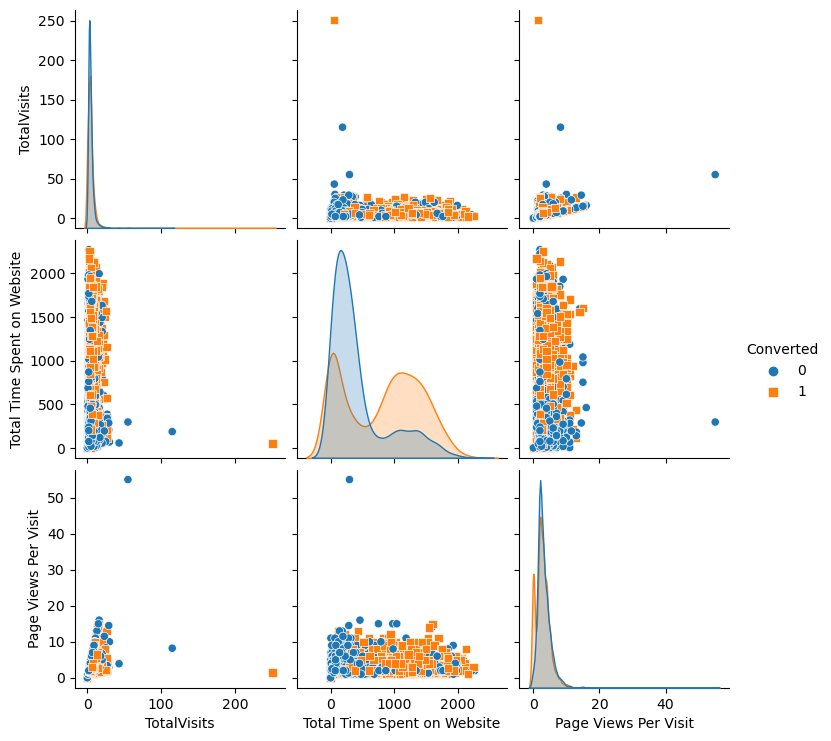

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(Lead_Scoring, diag_kind = 'kde', hue = 'Converted', markers=["o", "s"])
plt.show()


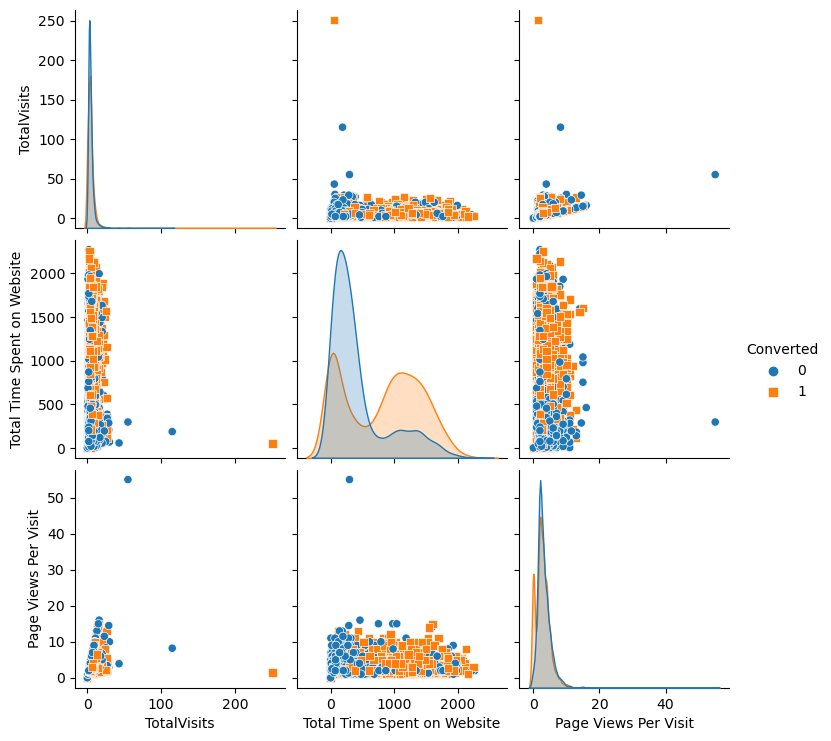

In [34]:
xedu = Lead_Scoring[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde',hue='Converted', markers=["o", "s"])
plt.show()

In [35]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-0.540502,1.262786,-0.334715,0.978835
1,-1.100397,-0.188143,-1.010705,-1.021623
2,-0.540502,1.344308,-0.334715,0.978835
3,1.132558,1.117421,2.025369,0.978835
4,1.132558,1.110714,0.036641,0.978835


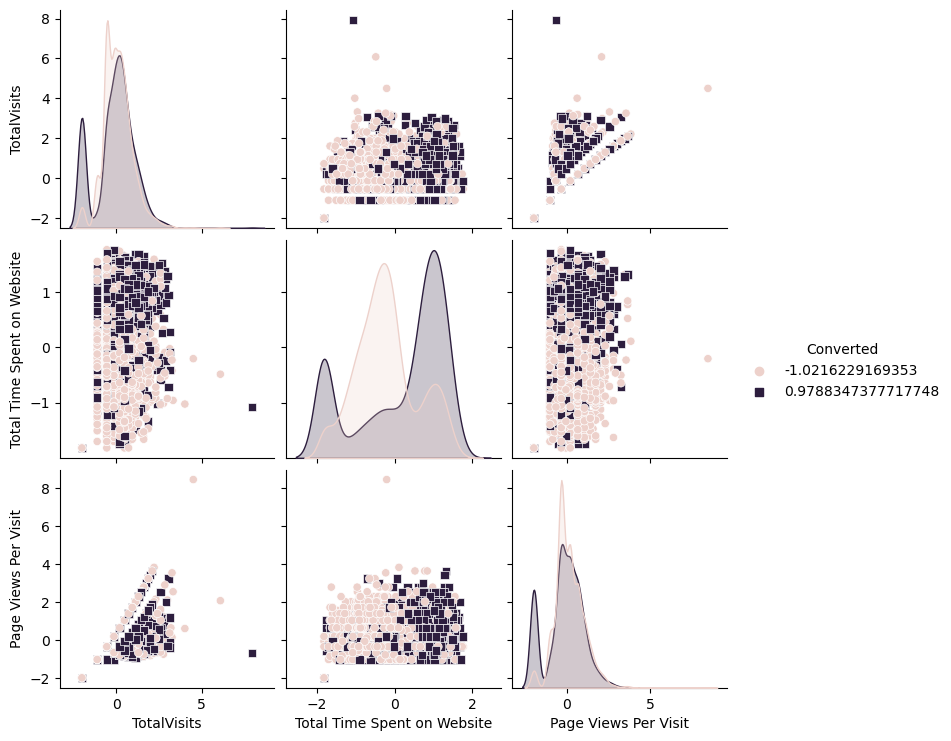

In [36]:
sns.pairplot(transformedxedu, diag_kind = 'kde', hue = 'Converted', markers=["o", "s"])
plt.show()

# Dummy Variable Creation:

#### Now we have to deal with the categorical variables present in the dataset.

In [37]:
# getting a list of categorical columns

temp = Lead_Scoring.loc[:, Lead_Scoring.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [38]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(Lead_Scoring[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
Lead_Scoring = pd.concat([Lead_Scoring, dummy], axis=1)


In [39]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(Lead_Scoring['Specialization'], prefix = 'Specialization')
Lead_Scoring = pd.concat([Lead_Scoring, dummy_spl], axis = 1)


In [40]:
# Drop the variables for which the dummy variables have been created

Lead_Scoring = Lead_Scoring.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)


In [41]:
# Let's take a look at the dataset again

Lead_Scoring.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,1,8.0,1351,8.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,1,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Train-Test Split

#Train-Test Split & Logistic Regression Model Building:

In [42]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
X = Lead_Scoring.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,8.0,1351,8.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [43]:
# Put the target variable in y

y = Lead_Scoring['Converted']

y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [44]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 2006 to 8099
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           3174 non-null   float64
 1   Total Time Spent on Website                           3174 non-null   int64  
 2   Page Views Per Visit                                  3174 non-null   float64
 3   Lead Origin_Landing Page Submission                   3174 non-null   uint8  
 4   Lead Origin_Lead Add Form                             3174 non-null   uint8  
 5   Lead Origin_Lead Import                               3174 non-null   uint8  
 6   Lead Source_Direct Traffic                            3174 non-null   uint8  
 7   Lead Source_Facebook                                  3174 non-null   uint8  
 8   Lead Source_Google                                    3

# Scaling of Data:

#### There are a few numeric variables present in the dataset which have different scales. So let's scale these variables.

In [46]:
#scaling numeric columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2006,0.055777,0.119159,0.127273,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5140,0.019920,0.005607,0.030364,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7588,0.015936,0.014019,0.072727,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5244,0.023904,0.073832,0.054545,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8663,0.043825,0.088785,0.066727,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Looking at the correlations


#### Let's now look at the correlations. As the number of variables are high, it's better to look at the table instead of plotting a heatmap

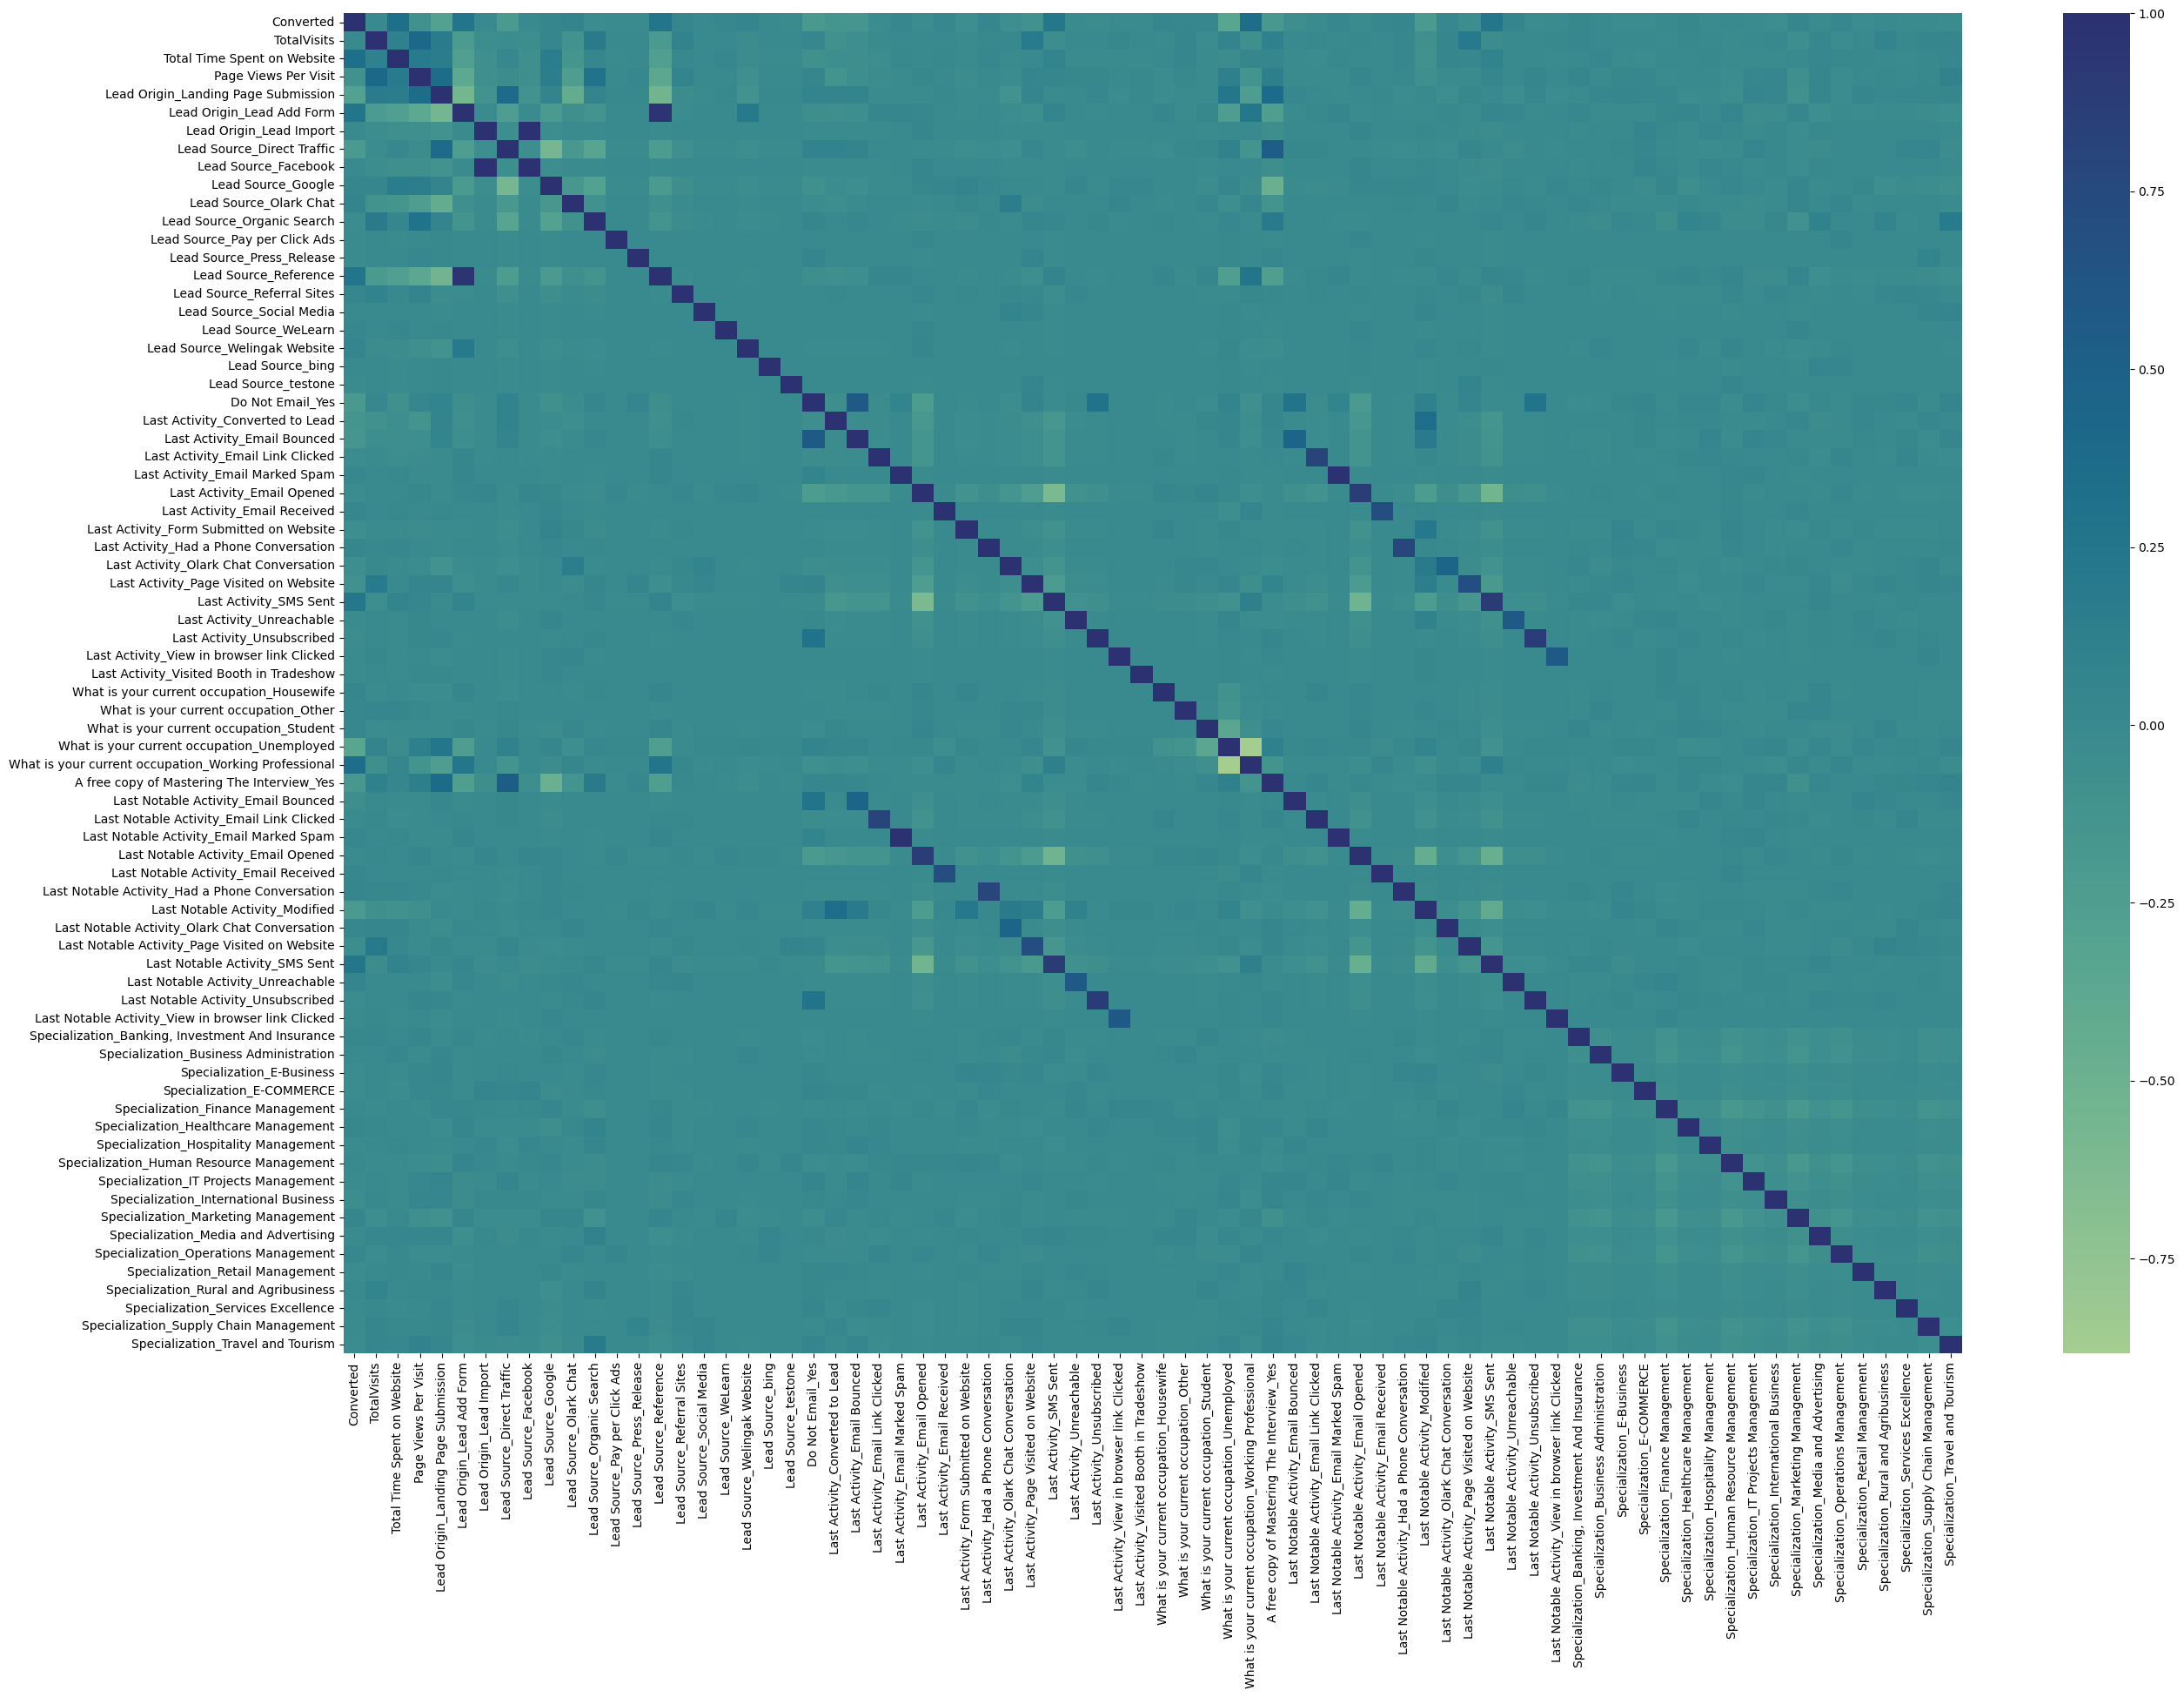

In [47]:
# Looking at the correlation table
plt.figure(figsize = (30,20))
sns.heatmap(Lead_Scoring.corr(), cmap="crest")
plt.show()


#### Model Building using Stats Model & RFE:

In [48]:
from sklearn.linear_model import LogisticRegression


In [49]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe =  RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [50]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 46),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 39),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 40),
 ('Lead Source_testone', False, 31),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email M

In [51]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]


Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.


In [52]:
# Select only the columns selected by RFE

X_train = X_train[col]


In [53]:
# Import statsmodels

import statsmodels.api as sm

In [54]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3158
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1430.2
Date:                Tue, 19 Sep 2023   Deviance:                       2860.3
Time:                        15:31:49   Pearson chi2:                 3.91e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3841
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7590      0.145     -5.222      0.000      -1.044      -0.474
TotalVisits                                              8.3299      2.690      3.097      0.002       3.058      13.602
Total Time Spent on Website                              3.9652      0.194     20.477      0.000       3.586       4.345
Lead Origin_Landing Page Submission                     -1.3532      0.144     -9.371      0.000      -1.636      -1.070
Lead Origin_Lead Add Form                                0.0659      1.233      0.053      0.957      -2.351       2.483
Lead Source_Reference                                    2.8181      1.269      2.220      0.026       0.330       5.306
Lead Source_Welingak Website                            23.6803   2.52e+04      0.001      0.999   -4.94e+04    4.94e+04
Do Not Email_Yes                                        -1.4630      0.255     -5.748      0.000      -1.962      -0.964
Last Activity_Converted to Lead                         -1.3121      0.287     -4.569      0.000      -1.875      -0.749
Last Activity_Email Bounced                             -2.2947      1.055     -2.176      0.030      -4.362      -0.228
Last Activity_SMS Sent                                   0.9979      0.100     10.012      0.000       0.803       1.193
What is your current occupation_Housewife               23.8662   2.73e+04      0.001      0.999   -5.36e+04    5.36e+04
What is your current occupation_Working Professional     2.7148      0.214     12.672      0.000       2.295       3.135
Last Notable Activity_Email Bounced                      2.8396      1.209      2.348      0.019       0.469       5.210
Last Notable Activity_Had a Phone Conversation          23.4878    2.3e+04      0.001      0.999    -4.5e+04    4.51e+04
Last Notable Activity_Unreachable                        2.8258      1.115      2.534      0.011       0.640       5.011
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.


In [55]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [56]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,Lead Origin_Lead Add Form,77.00
4,Lead Source_Reference,74.14
5,Lead Source_Welingak Website,4.00
2,Lead Origin_Landing Page Submission,2.85
1,Total Time Spent on Website,2.18
8,Last Activity_Email Bounced,1.87
6,Do Not Email_Yes,1.67
9,Last Activity_SMS Sent,1.59
0,TotalVisits,1.56
12,Last Notable Activity_Email Bounced,1.27


VIFs seem to be in a decent range except for three variables.

Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.


In [57]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)


In [58]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3159
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1432.7
Date:                Tue, 19 Sep 2023   Deviance:                       2865.4
Time:                        15:31:49   Pearson chi2:                 3.80e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3831
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7608      0.145     -5.233      0.000      -1.046      -0.476
TotalVisits                                              8.3368      2.691      3.098      0.002       3.063      13.610
Total Time Spent on Website                              3.9666      0.194     20.482      0.000       3.587       4.346
Lead Origin_Landing Page Submission                     -1.3536      0.144     -9.372      0.000      -1.637      -1.071
Lead Origin_Lead Add Form                                2.7168      0.336      8.075      0.000       2.057       3.376
Lead Source_Welingak Website                            21.0301   2.52e+04      0.001      0.999   -4.94e+04    4.94e+04
Do Not Email_Yes                                        -1.4595      0.254     -5.746      0.000      -1.957      -0.962
Last Activity_Converted to Lead                         -1.3112      0.287     -4.565      0.000      -1.874      -0.748
Last Activity_Email Bounced                             -2.2963      1.055     -2.178      0.029      -4.363      -0.230
Last Activity_SMS Sent                                   1.0014      0.100     10.056      0.000       0.806       1.197
What is your current occupation_Housewife               23.8732   2.74e+04      0.001      0.999   -5.37e+04    5.37e+04
What is your current occupation_Working Professional     2.7187      0.214     12.697      0.000       2.299       3.138
Last Notable Activity_Email Bounced                      2.8387      1.209      2.347      0.019       0.468       5.209
Last Notable Activity_Had a Phone Conversation          23.4891    2.3e+04      0.001      0.999    -4.5e+04    4.51e+04
Last Notable Activity_Unreachable                        2.8307      1.114      2.540      0.011       0.646       5.015
========================================================================================================================
"""

The variable Lead Profile_Dual Specialization Student also needs to be dropped.



In [59]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Lead Origin_Landing Page Submission,2.85
1,Total Time Spent on Website,2.18
7,Last Activity_Email Bounced,1.87
5,Do Not Email_Yes,1.67
8,Last Activity_SMS Sent,1.58
0,TotalVisits,1.56
11,Last Notable Activity_Email Bounced,1.27
10,What is your current occupation_Working Profes...,1.25
3,Lead Origin_Lead Add Form,1.19
6,Last Activity_Converted to Lead,1.08


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.


In [60]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)


In [61]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3160
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1437.6
Date:                Tue, 19 Sep 2023   Deviance:                       2875.3
Time:                        15:31:49   Pearson chi2:                 3.80e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7423      0.145     -5.122      0.000      -1.026      -0.458
TotalVisits                                              8.5258      2.697      3.161      0.002       3.239      13.813
Total Time Spent on Website                              3.9562      0.193     20.471      0.000       3.577       4.335
Lead Origin_Landing Page Submission                     -1.3633      0.144     -9.472      0.000      -1.645      -1.081
Lead Origin_Lead Add Form                                2.7011      0.336      8.033      0.000       2.042       3.360
Lead Source_Welingak Website                            20.0296   1.53e+04      0.001      0.999      -3e+04       3e+04
Do Not Email_Yes                                        -1.4652      0.254     -5.771      0.000      -1.963      -0.968
Last Activity_Converted to Lead                         -1.3180      0.287     -4.591      0.000      -1.881      -0.755
Last Activity_Email Bounced                             -2.2997      1.055     -2.181      0.029      -4.366      -0.233
Last Activity_SMS Sent                                   0.9919      0.099      9.975      0.000       0.797       1.187
What is your current occupation_Housewife               22.8628   1.66e+04      0.001      0.999   -3.25e+04    3.26e+04
What is your current occupation_Working Professional     2.7119      0.214     12.669      0.000       2.292       3.131
Last Notable Activity_Email Bounced                      2.8372      1.210      2.346      0.019       0.466       5.208
Last Notable Activity_Unreachable                        2.8200      1.115      2.530      0.011       0.636       5.004
========================================================================================================================
"""

In [62]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)


In [63]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3161
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1442.3
Date:                Tue, 19 Sep 2023   Deviance:                       2884.7
Time:                        15:31:49   Pearson chi2:                 3.81e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7341      0.145     -5.073      0.000      -1.018      -0.450
TotalVisits                                              8.3649      2.687      3.114      0.002       3.099      13.631
Total Time Spent on Website                              3.9527      0.193     20.489      0.000       3.575       4.331
Lead Origin_Landing Page Submission                     -1.3568      0.144     -9.445      0.000      -1.638      -1.075
Lead Origin_Lead Add Form                                2.7071      0.336      8.057      0.000       2.048       3.366
Lead Source_Welingak Website                            20.0179   1.53e+04      0.001      0.999      -3e+04       3e+04
Do Not Email_Yes                                        -1.4669      0.254     -5.782      0.000      -1.964      -0.970
Last Activity_Converted to Lead                         -1.3281      0.287     -4.630      0.000      -1.890      -0.766
Last Activity_Email Bounced                             -2.3085      1.054     -2.190      0.029      -4.375      -0.242
Last Activity_SMS Sent                                   0.9820      0.099      9.889      0.000       0.787       1.177
What is your current occupation_Working Professional     2.7059      0.214     12.643      0.000       2.286       3.125
Last Notable Activity_Email Bounced                      2.8394      1.209      2.348      0.019       0.469       5.210
Last Notable Activity_Unreachable                        2.8090      1.114      2.521      0.012       0.625       4.993
========================================================================================================================
"""

Drop What is your current occupation_Working Professional.


In [64]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)


In [65]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3162
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1572.6
Date:                Tue, 19 Sep 2023   Deviance:                       3145.3
Time:                        15:31:49   Pearson chi2:                 3.29e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3262
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.3362      0.134     -2.500      0.012      -0.600      -0.073
TotalVisits                             7.2217      2.569      2.811      0.005       2.187      12.256
Total Time Spent on Website             3.9998      0.187     21.428      0.000       3.634       4.366
Lead Origin_Landing Page Submission    -1.5441      0.136    -11.324      0.000      -1.811      -1.277
Lead Origin_Lead Add Form               2.7874      0.326      8.541      0.000       2.148       3.427
Lead Source_Welingak Website           19.5169   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
Do Not Email_Yes                       -1.4733      0.238     -6.191      0.000      -1.940      -1.007
Last Activity_Converted to Lead        -1.1120      0.260     -4.284      0.000      -1.621      -0.603
Last Activity_Email Bounced            -2.3860      1.048     -2.276      0.023      -4.441      -0.331
Last Activity_SMS Sent                  1.0313      0.095     10.899      0.000       0.846       1.217
Last Notable Activity_Email Bounced     2.8549      1.211      2.358      0.018       0.482       5.228
Last Notable Activity_Unreachable       2.6857      1.102      2.436      0.015       0.525       4.846
=======================================================================================================
"""

In [66]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Lead Origin_Landing Page Submission,2.85
1,Total Time Spent on Website,2.11
7,Last Activity_Email Bounced,1.87
5,Do Not Email_Yes,1.67
0,TotalVisits,1.56
8,Last Activity_SMS Sent,1.55
9,Last Notable Activity_Email Bounced,1.27
3,Lead Origin_Lead Add Form,1.10
6,Last Activity_Converted to Lead,1.08
4,Lead Source_Welingak Website,1.04


# Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.


In [67]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]


2006    0.268771
5140    0.152647
7588    0.336746
5244    0.405874
8663    0.064043
734     0.091240
4481    0.920646
971     0.625396
5106    0.276805
869     0.468124
dtype: float64

In [68]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.26877103, 0.15264689, 0.33674568, 0.40587389, 0.0640429 ,
       0.09123967, 0.9206464 , 0.62539588, 0.27680481, 0.46812431])

Creating a dataframe with the actual conversion flag and the predicted probabilities


In [69]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()


,Converted,Conversion_Prob
0,0,0.268771
1,0,0.152647
2,1,0.336746
3,0,0.405874
4,0,0.064043


Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0


In [70]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.268771,0
1,0,0.152647,0
2,1,0.336746,0
3,0,0.405874,0
4,0,0.064043,0


#### Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [71]:
# Import metrics from sklearn for evaluation

from sklearn import metrics


In [72]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)


[[1225  328]
 [ 396 1225]]


In [73]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.7718966603654694


In [74]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [75]:
# Calculate the sensitivity

TP/(TP+FN)


0.7557063541024059

In [76]:
# Calculate the specificity

TN/(TN+FP)


0.7887958789439794

#### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, we need to optimise the threshold. Now let's plot an ROC curve to see what AUC we get.


In [77]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


In [79]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt


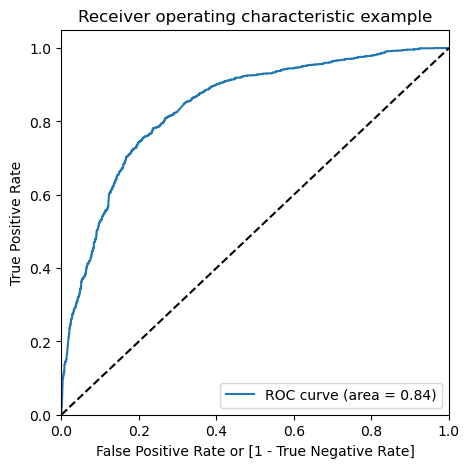

In [80]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


The area under the curve of the ROC is 0.86 which is quite good.It seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.



In [81]:
#creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.268771,0,1,1,1,0,0,0,0,0,0,0
1,0,0.152647,0,1,1,0,0,0,0,0,0,0,0
2,1,0.336746,0,1,1,1,1,0,0,0,0,0,0
3,0,0.405874,0,1,1,1,1,1,0,0,0,0,0
4,0,0.064043,0,1,0,0,0,0,0,0,0,0,0


In [83]:
#creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.510712  1.000000  0.000000
0.1   0.1  0.566163  0.993831  0.119768
0.2   0.2  0.665406  0.952498  0.365744
0.3   0.3  0.742596  0.913017  0.564713
0.4   0.4  0.765280  0.855028  0.671603
0.5   0.5  0.771897  0.755706  0.788796
0.6   0.6  0.754568  0.662554  0.850612
0.7   0.7  0.710460  0.533621  0.895042
0.8   0.8  0.658790  0.392967  0.936252
0.9   0.9  0.599874  0.237508  0.978107


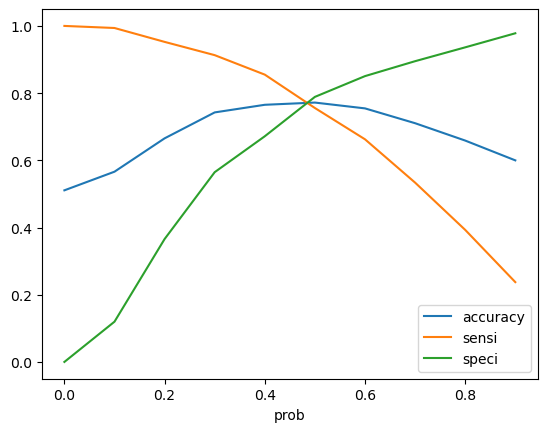

In [84]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


As you can see that around 0.42, we get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [85]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.268771,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.152647,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.336746,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.405874,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.064043,0,1,0,0,0,0,0,0,0,0,0,0


In [86]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7665406427221172

In [87]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1097,  456],
       [ 285, 1336]], dtype=int64)

In [88]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [89]:
# Calculate Sensitivity

TP/(TP+FN)


0.824182603331277

In [90]:
# Calculate Specificity

TN/(TN+FP)


0.7063747585318738

This cutoff point seems good to go!

#### Making Predictions on the Test Set

In [91]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [92]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()


,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8536,0.007968,0.015421,1,0,0,0,0,0,0,1,0,0,0,0,0
945,0.011952,0.193925,0,0,0,0,0,1,0,0,0,0,0,0,0
1550,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0
8570,0.015936,0.109346,1,0,0,0,0,0,0,0,0,1,0,0,1
1410,0.019920,0.137383,1,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])


In [94]:
# Check X_test_sm

X_test_sm


,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8536,1.0,0.007968,0.015421,1,0,0,0,0,0,0,1,0,0,0,0,0
945,1.0,0.011952,0.193925,0,0,0,0,0,1,0,0,0,0,0,0,0
1550,1.0,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0
8570,1.0,0.015936,0.109346,1,0,0,0,0,0,0,0,0,1,0,0,1
1410,1.0,0.019920,0.137383,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,1.0,0.007968,0.181776,1,0,0,0,0,0,0,0,0,0,0,0,0
8201,1.0,0.007968,0.591589,1,0,0,0,0,0,0,0,0,0,0,0,0
7328,1.0,0.011952,0.084579,1,0,0,0,0,0,0,1,0,0,0,0,0
283,1.0,0.015936,0.137383,1,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)


In [96]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))


In [97]:
y_test_pred[:10]


8536    0.325246
945     0.357494
1550    0.920646
8570    0.795410
1410    0.233810
5664    0.906395
5232    0.061881
6744    0.252588
6924    0.348719
3878    0.275819
dtype: float64

In [98]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)


In [99]:

y_pred_1.head()


,0
8536,0.325246
945,0.357494
1550,0.920646
8570,0.795410
1410,0.233810


In [100]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [101]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [102]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [103]:
# Check 'y_pred_final'

y_pred_final.head()


,Converted,0
0,0,0.325246
1,0,0.357494
2,1,0.920646
3,1,0.795410
4,0,0.233810


In [104]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [105]:
# Let's see the head of y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob
0,0,0.325246
1,0,0.357494
2,1,0.920646
3,1,0.795410
4,0,0.233810


In [106]:
# Making predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)


In [107]:
# Checking y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
0,0,0.325246,0
1,0,0.357494,0
2,1,0.920646,1
3,1,0.795410,1
4,0,0.233810,0


In [108]:
#checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.7670830271858927

In [109]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[465, 201],
       [116, 579]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [111]:
# Calculating sensitivity

TP / float(TP+FN)

0.8330935251798561

In [112]:
# Calculating specificity

TN / float(TN+FP)


0.6981981981981982

#### Precision-Recall View
Let's now also build the training model using the precision-recall view

In [113]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion


array([[1225,  328],
       [ 396, 1225]], dtype=int64)

In [114]:
#Precision

TP / TP + FP

202.0

In [115]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.7887958789439794

In [116]:
#Recall

TP / TP + FN


117.0

In [117]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7557063541024059

#### Precision and recall tradeoff


In [118]:
from sklearn.metrics import precision_recall_curve

In [119]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 3169    1
 3170    0
 3171    1
 3172    1
 3173    1
 Name: Converted, Length: 3174, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3169    0
 3170    1
 3171    1
 3172    1
 3173    1
 Name: Predicted, Length: 3174, dtype: int64)

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


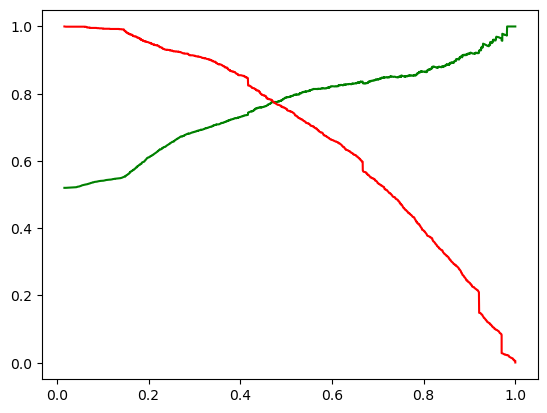

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.268771,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.152647,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.336746,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.405874,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.064043,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
#checking the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7709514807813485

In [124]:
#creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[1137,  416],
       [ 311, 1310]], dtype=int64)

In [125]:
#evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [126]:
# Calculating Precision

TP/(TP+FP)


0.7589803012746235

In [127]:
# Calculating Recall

TP/(TP+FN)


0.8081431215299199

#### Making Predictions on the Test Set
Let's now make predicitons on the test set.


In [128]:
#Doing predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))


In [129]:
y_test_pred[:10]


8536    0.325246
945     0.357494
1550    0.920646
8570    0.795410
1410    0.233810
5664    0.906395
5232    0.061881
6744    0.252588
6924    0.348719
3878    0.275819
dtype: float64

In [130]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)


In [131]:


y_pred_1.head()


,0
8536,0.325246
945,0.357494
1550,0.920646
8570,0.795410
1410,0.233810


In [132]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)


In [133]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [134]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [135]:
# Checking 'y_pred_final'

y_pred_final.head()


,Converted,0
0,0,0.325246
1,0,0.357494
2,1,0.920646
3,1,0.795410
4,0,0.233810


In [136]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [137]:
#head of y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob
0,0,0.325246
1,0,0.357494
2,1,0.920646
3,1,0.795410
4,0,0.233810


In [138]:
#Doing predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)


In [139]:
# Checking y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
0,0,0.325246,0
1,0,0.357494,0
2,1,0.920646,1
3,1,0.795410,1
4,0,0.233810,0


In [140]:
#checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.7656135194709772

In [141]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[477, 189],
       [130, 565]], dtype=int64)

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [143]:
# Calculating Precision

TP/(TP+FP)


0.7493368700265252

In [144]:
# Calculating Recall

TP/(TP+FN)


0.8129496402877698

In [145]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website           19.516901
TotalVisits                             7.221679
Total Time Spent on Website             3.999763
Last Notable Activity_Email Bounced     2.854930
Lead Origin_Lead Add Form               2.787377
Last Notable Activity_Unreachable       2.685681
Last Activity_SMS Sent                  1.031288
const                                  -0.336215
Last Activity_Converted to Lead        -1.112012
Do Not Email_Yes                       -1.473347
Lead Origin_Landing Page Submission    -1.544062
Last Activity_Email Bounced            -2.385986
dtype: float64

# Summary

#### Train dataset: 
 - Accuracy:- 77%
 - Sesitivity:- 82%
#### Test set
 - Accuracy :- 77%
 - Sensitivity:- 83%

#### Note: 
 - We have noticed that the evaluation metrics is almost the same for both the train and the test data.
 - This indicated that the model performance is consistent.
 - The top feature contributing to the prediction of hot lead is : Lead Source_Welingak Website